# Joukowski Transformation
## Kyle Choy - MAE6226

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Shapes Created by Joukowski Transformation

#### First plot circle on the z-plane with radius of 1.5, then transform on Xi plane

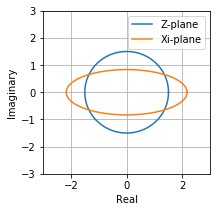

In [3]:
c = 1
R = 1.5
theta = np.linspace(0,2*np.pi,100)
z = (R*np.cos(theta)) + 1j * (R*np.sin(theta))

#Transformation onto Xi plane
xi = z + c/z

size = 3
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.plot(z.real,z.imag,label = 'Z-plane')
plt.plot(xi.real,xi.imag,label = 'Xi-plane')
plt.legend(loc='best', prop={'size':10})

#### Circle radius such that c < R < 2c (e.g., c=1; R=1.2), centered at (xc, yc)=(c − R, 0) on z-plane

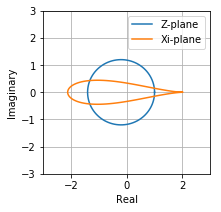

In [4]:
R = 1.2 
xc,yc = c-R,0.

z = (R*np.cos(theta)+xc) + 1j *(R*np.sin(theta))
xi = z + c/z

size = 3
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.plot(z.real,z.imag,label = 'Z-plane')
plt.plot(xi.real,xi.imag,label = 'Xi-plane')
plt.legend(loc='best', prop={'size':10})

#### Put a circle at (xc, yc)=(−Δx, Δy), where Δx and Δy are small positive numbers, e.g. Δx = 0.1 and Δy = 0.1. The radius R of the circle is R=[(c−xc)^2+yc^2]^0.5.

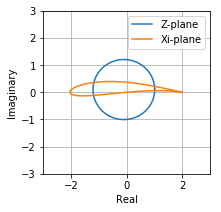

In [5]:
dx = 0.1
dy = 0.1

xc,yc = -dx,dy
R = np.sqrt((c-xc)**2+yc**2)

z = (R*np.cos(theta) + xc) + 1j * (R * np.sin(theta) + yc)
xi = z + c/z

size = 3
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.plot(z.real,z.imag,label = 'Z-plane')
plt.plot(xi.real,xi.imag,label = 'Xi-plane')
plt.legend(loc='best', prop={'size':10})

## Grid points on z-plane

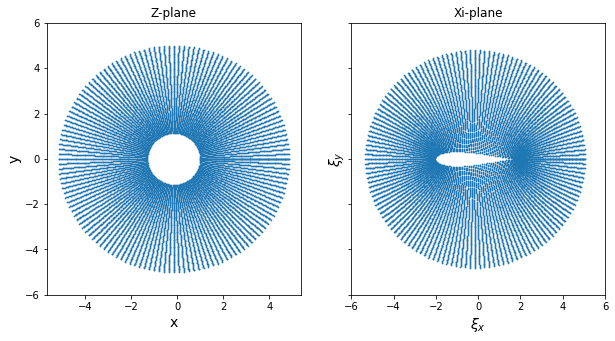

In [6]:
R = 1.15
xc,yc = -0.15,0.0
N_theta, N_r = 145,100
theta = np.linspace(0,2*np.pi,N_theta)
r = np.linspace(R,5,N_r)

r_mesh,theta_mesh = np.meshgrid(r,theta)

z = (r_mesh*np.cos(theta_mesh)+xc) + 1j*(r_mesh*np.sin(theta_mesh)+yc)
xi = z + c/z


f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(5)
f.set_figwidth(10)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax1.set_title('Z-plane')
ax1.scatter(z.real,z.imag,s=0.5) 
ax2.set_title('Xi-plane')
ax2.scatter(xi.real,xi.imag,s=0.5)

## Flow over symmetric Joukowski airfoil with zero angle of attack 

Strength of doublet found using the equation

$$R = \sqrt{\frac{\kappa}{2\pi U_\infty}}$$

In [7]:
u_inf,v_inf = 1.0,0.0
u_freestream = u_inf*np.ones((N_theta,N_r))
v_freestream = v_inf*np.ones((N_theta,N_r))
psi_freestream = u_inf*z.imag
kappa = 2*np.pi*u_inf*R**2

In [8]:
def vel_profile_doublet(kappa,x_loc,y_loc,X,Y):
    
    u = -kappa/(2*np.pi) * ((X-x_loc)**2-(Y-y_loc)**2)/((X-x_loc)**2+(Y-y_loc)**2)**2
    
    v = -kappa/(2*np.pi) * 2*(X-x_loc)*(Y-y_loc)/((X-x_loc)**2+(Y-y_loc)**2)**2
    
    return u,v

def streamfunc_doublet(kappa,x_loc,y_loc,X,Y):
    
    psi = -kappa/(2*np.pi)*(Y-y_loc)/((X-x_loc)**2+(Y-y_loc)**2)
    
    return psi

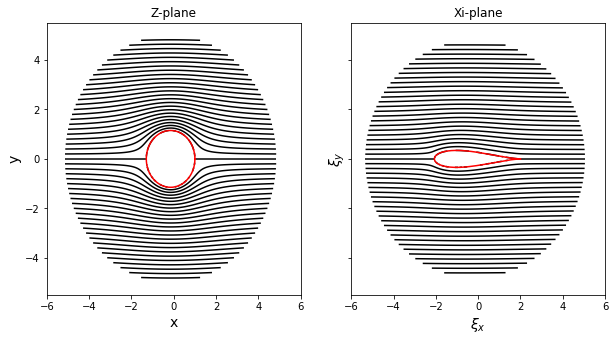

In [9]:
u_dub,v_dub = vel_profile_doublet(kappa,xc,yc,z.real,z.imag)
psi_dub = streamfunc_doublet(kappa,xc,yc,z.real,z.imag)

u = u_dub+u_freestream
v = v_dub+v_freestream

psi = psi_dub + psi_freestream

z_plot = R*np.cos(theta)+xc + 1j*R*np.sin(theta)
xi_plot = z_plot+c/z_plot

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(5)
f.set_figwidth(10)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-6,6)
ax2.set_xlim(-6,6)
ax1.set_title('Z-plane')
ax1.contour(z.real,z.imag,psi,levels = np.linspace(np.min(psi),np.max(psi),51), colors ='k',linestyles='solid') 
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane')
ax2.contour(xi.real,xi.imag,psi,levels = np.linspace(np.min(psi),np.max(psi),51), colors ='k',linestyles='solid')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')

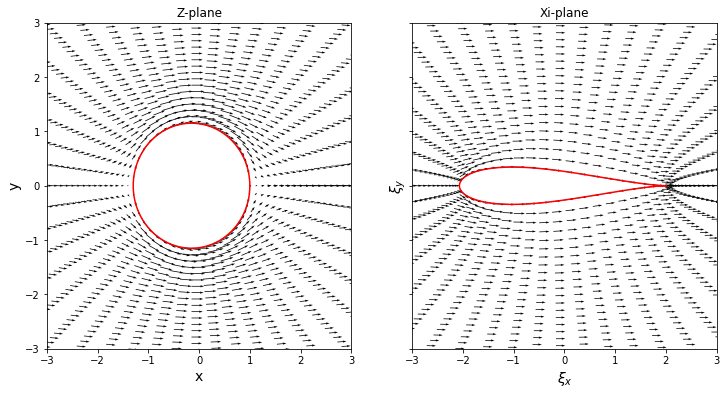

In [27]:
Wz = u - 1j*v

Wxi = Wz/(1-(c/z)**2)

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane')
ax1.quiver(z.real[::3,::3],z.imag[::3,::3],u[::3,::3],v[::3,::3],units='inches', scale=8.0) #every three data points
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane')
ax2.quiver(xi.real[::3,::3],xi.imag[::3,::3],Wxi.real[::3,::3],-Wxi.imag[::3,::3],units='inches', scale=8.0)
ax2.plot(xi_plot.real,xi_plot.imag,color='r')


In [11]:
print('61st velocity point on airfoil surface is', Wxi[61,0])

61st velocity point on airfoil surface is (1.10633846629-0.523633349298j)


### Pressure Coefficients

The minimum pressure coefficient value on the airfoil surface is -12.0832616327


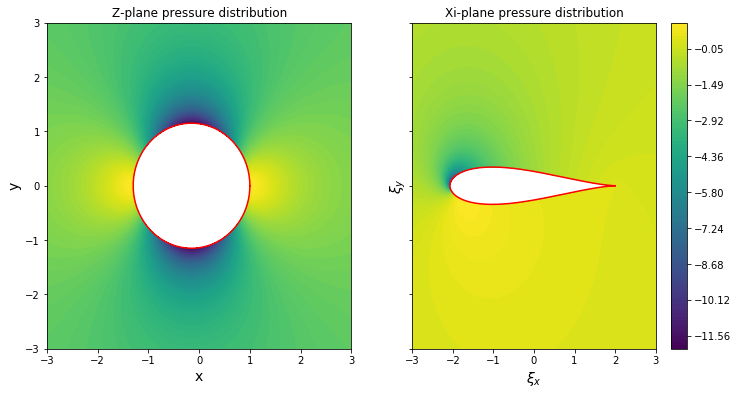

In [144]:
cp_z = 1.0 - (u**2+v**2)/u_inf**2
cp_xi = 1.0 - (Wxi.real**2+Wxi.imag**2)/u_inf**2

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane pressure distribution')
ax1.contourf(z.real,z.imag,cp_z,levels = np.linspace(np.min(cp_z),np.max(cp_z),101), cmap ='viridis')
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane pressure distribution')
f2= ax2.contourf(xi.real,xi.imag,cp_xi,levels = np.linspace(np.min(cp_xi),np.max(cp_xi),101), cmap ='viridis')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')
plt.colorbar(f2)



print('The minimum pressure coefficient value on the airfoil surface is', np.min(cp_xi))

## Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

Transformation of grid

\begin{array}{l}
x' = (x-x_c)\cos(AoA) + (y-y_c)\sin(AoA) \\
y' = - (x-x_c)\sin(AoA) + (y-y_c)\cos(AoA)
\end{array}

In [145]:
AoA = 20*np.pi/180

#transform grid by rotating
x_prime = (z.real-xc)*np.cos(AoA)+(z.imag-yc)*np.sin(AoA)
y_prime = -(z.real-xc)*np.sin(AoA)+(z.imag-yc)*np.cos(AoA)

u_dub_prime,v_dub_prime = vel_profile_doublet(kappa,0,0,x_prime,y_prime)
psi_dub_prime = streamfunc_doublet(kappa,0,0,x_prime,y_prime)

psi_freestream_prime = u_inf*y_prime
u_prime = u_dub_prime + u_freestream
v_prime = v_dub_prime + v_freestream
psi_prime = psi_dub_prime + psi_freestream_prime

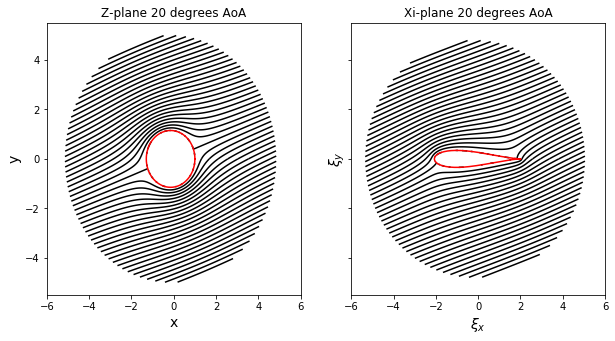

In [146]:
f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(5)
f.set_figwidth(10)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-6,6)
ax2.set_xlim(-6,6)
ax1.set_title('Z-plane 20 degrees AoA')
ax1.contour(z.real,z.imag,psi_prime,levels = np.linspace(np.min(psi_prime),np.max(psi_prime),51), colors ='k',linestyles='solid') 
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane 20 degrees AoA')
ax2.contour(xi.real,xi.imag,psi_prime,levels = np.linspace(np.min(psi_prime),np.max(psi_prime),51), colors ='k',linestyles='solid')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')

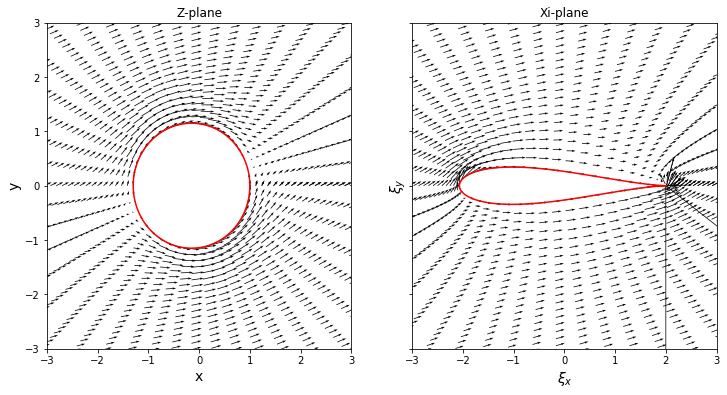

In [147]:
Wz_prime = u_prime - 1j*v_prime
Wz = Wz_prime*np.exp(-1j*AoA)

Wxi = (Wz)/(1-(c/z)**2)

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane')
ax1.quiver(z.real[::3,::3],z.imag[::3,::3],Wz.real[::3,::3],-Wz.imag[::3,::3],units='inches', scale=8.0) #every three data points
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane')
ax2.quiver(xi.real[::3,::3],xi.imag[::3,::3],Wxi.real[::3,::3],-Wxi.imag[::3,::3],units='inches', scale=8.0)
ax2.plot(xi_plot.real,xi_plot.imag,color='r')

Location of stagnation point is where the velocity is equal to 0 (in this case it will be where the value is closest to 0 since conputing errors may not place the value at exactly 0)

In [148]:
np.where(np.abs(Wz[:,0]).real< 1e-8) #Add one since index starts at 0 for python

(array([ 8, 80]),)

### Pressure Coefficients

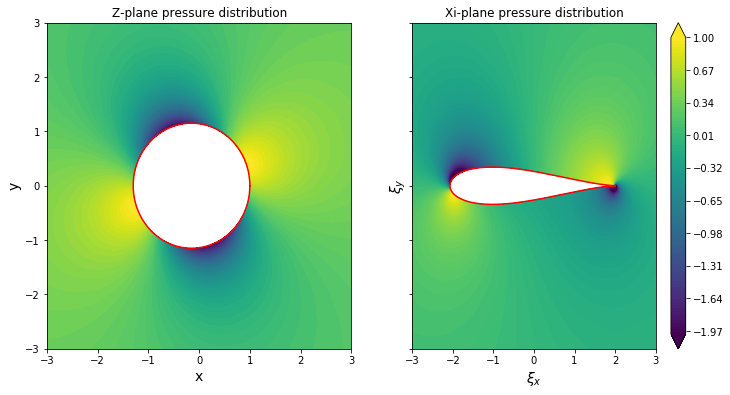

In [149]:
cp_prime_z = 1.0 - (Wz.real**2+Wz.imag**2)/u_inf**2
cp_prime_xi = 1.0 - (Wxi.real**2+Wxi.imag**2)/u_inf**2

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane pressure distribution')
ax1.contourf(z.real,z.imag,cp_prime_z,levels = np.linspace(np.min(cp_prime_z),np.max(cp_prime_z),81), cmap ='viridis')
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane pressure distribution')
f2= ax2.contourf(xi.real,xi.imag,cp_prime_xi,levels = np.linspace(-2.0,1.0,101),cmap='viridis',extend='both')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')
plt.colorbar(f2)


In [159]:
print('The lift is 0 since there is no circulation')
print('The 50th u velocity componenet on the airfoil is',Wxi.real[49,0])
print('The 50th v velocity componenet on the airfoil is',-Wxi.imag[49,0])
print('The 75th pressure coefficient on the airfoil is', cp_prime_xi[74,0])

The lift is 0 since there is no circulation
The 50th u velocity componenet on the airfoil is 1.48306541501
The 50th v velocity componenet on the airfoil is 0.0920754950073
The 75th pressure coefficient on the airfoil is -0.485209916437


## Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

Introduce vortex with same angle of attack

In [151]:
def vel_profile_vortex(gamma,x,y,X,Y):
    
    u = gamma/(2*np.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    v = -gamma/(2*np.pi)*(X-x)/((X-x)**2+(Y-y)**2)
    
    return u,v

def streamfunc_vortex(gamma,x,y,X,Y):
    
    psi = gamma/(4*np.pi)*np.log((X-x)**2+(Y-y)**2)
    
    return psi

Calculate the vortex strength so that the rear stagnation point is located at theta = 0 on the z-plane

\begin{equation}
\Gamma = 4\pi U_\infty R \sin(\theta)
\end{equation}

In [152]:
gamma = 4*np.pi*u_inf*R*np.sin(AoA)

u_vor_prime,v_vor_prime = vel_profile_vortex(gamma,0.0,0.0,x_prime,y_prime)
psi_vor_prime = streamfunc_vortex(gamma,0.0,0.0,x_prime,y_prime)

u_prime_all = u_prime + u_vor_prime
v_prime_all = v_prime + v_vor_prime
psi_prime_all = psi_prime + psi_vor_prime

print('Strength of the vortex is', gamma)

Strength of the vortex is 4.9426446604


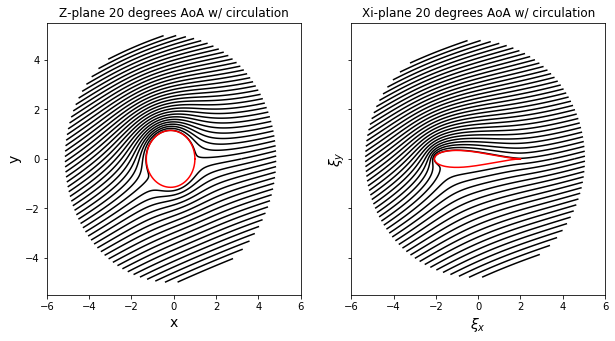

In [153]:
f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(5)
f.set_figwidth(10)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-6,6)
ax2.set_xlim(-6,6)
ax1.set_title('Z-plane 20 degrees AoA w/ circulation')
ax1.contour(z.real,z.imag,psi_prime_all,levels = np.linspace(np.min(psi_prime_all),np.max(psi_prime_all),51), colors ='k',linestyles='solid') 
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane 20 degrees AoA w/ circulation')
ax2.contour(xi.real,xi.imag,psi_prime_all,levels = np.linspace(np.min(psi_prime_all),np.max(psi_prime_all),51), colors ='k',linestyles='solid')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')

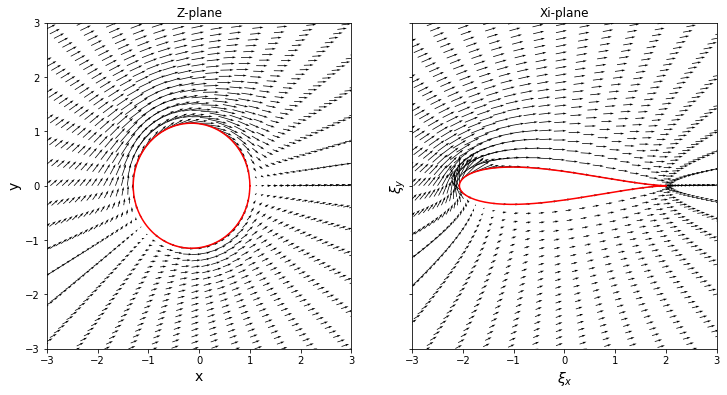

In [154]:
Wz_prime_all = u_prime_all - 1j*v_prime_all
Wz_all = Wz_prime_all*np.exp(-1j*AoA)

Wxi_all = (Wz_all)/(1-(c/z)**2)

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane')
ax1.quiver(z.real[::3,::3],z.imag[::3,::3],Wz_all.real[::3,::3],-Wz_all.imag[::3,::3],units='inches', scale=8.0) #every three data points
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane')
ax2.quiver(xi.real[::3,::3],xi.imag[::3,::3],Wxi_all.real[::3,::3],-Wxi_all.imag[::3,::3],units='inches', scale=8.0)
ax2.plot(xi_plot.real,xi_plot.imag,color='r')

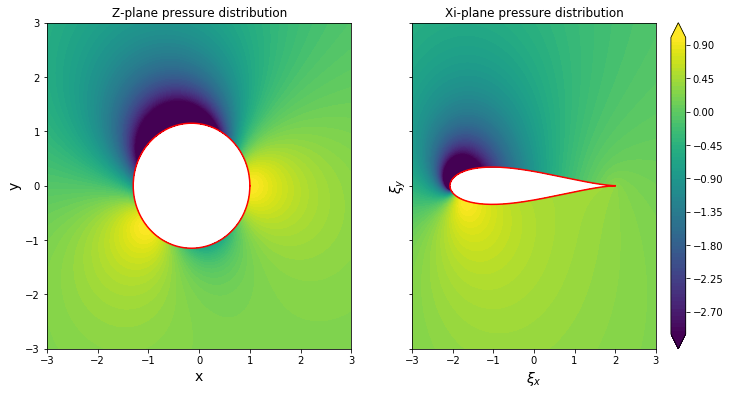

In [155]:
cp_prime_z_all = 1.0 - (Wz_all.real**2+Wz_all.imag**2)/u_inf**2
cp_prime_xi_all = 1.0 - (Wxi_all.real**2+Wxi_all.imag**2)/u_inf**2

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane pressure distribution')
ax1.contourf(z.real,z.imag,cp_prime_z_all,levels = np.linspace(np.min(cp_prime_z),np.max(cp_prime_z),81), extend = 'both',cmap ='viridis')
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane pressure distribution')
f2= ax2.contourf(xi.real,xi.imag,cp_prime_xi_all,levels = np.linspace(-3.0,1.0,81),cmap='viridis',extend='both')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')
plt.colorbar(f2)

In [156]:
np.where(np.abs(Wxi_all[:,0]).real< 1e-6) #Add one since index starts at 0 for python

(array([88]),)

In [158]:
rho = 1.0
lift = rho*gamma*u_inf
print('The lift on the airfoil is',lift)
print('The 92nd u velocity component on the airfoil is', Wxi_all.real[91,0])
print('The 92nd v velocity component on the airfoil is', -Wxi_all.imag[91,0])
print('The 75th pressure coefficient on the airfoil is', cp_prime_xi_all[110,0])

The lift on the airfoil is 4.9426446604
The 92nd u velocity component on the airfoil is 0.208483116207
The 92nd v velocity component on the airfoil is -0.0319883891951
The 75th pressure coefficient on the airfoil is 0.496694672383


# END